In [1]:
import pandas as pd

ita_08 = pd.read_csv("C:\\Users\\stefa\\Desktop\\dsLab\\progetto_finale\\berakbyHour\\italia12mattina.csv")
ita_08

,Unnamed: 0,TSTOT.PrezzoITA,TSTOT.ConsumiITA,TSTOT.GradiITA,TSTOT.BankHolidayITA,TSTOT.EndYearITA,TSTOT.AugustBorderITA,TSTOT.EndYearITA.1,TSTOT.AugustCenterITA,lunedi,martedi,mercoledi,giovedi,venerdi,sabato,domenica
0,0,65.89,26333.19,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,86.40,36801.70,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,87.98,38104.09,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,86.08,37895.71,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,88.80,37201.12,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,36.35,20777.95,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1456,1456,42.27,22314.22,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,1457,52.35,29264.77,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1458,1458,49.28,30202.84,-2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [2]:
ita_08 = ita_08.drop(ita_08.columns[[0]], axis=1)
del ita_08["TSTOT.EndYearITA.1"]
ita_08.columns = ["Prezzo","Consumo","Gradi","BankH","EndYear","AugustB","AugustC","lunedi","martedi","mercoledi","giovedi","venerdi","sabato","domenica"]
ita_08.Gradi = ita_08.Gradi.shift(1)
ita_08.Prezzo = ita_08.Prezzo.shift(1)
ita_08["Giorno"] = ["lun" if lu==1 else "mar" if ma==1 else "mer" if me==1 else "gio" if gi==1 else "ven" if ve==1 else "sab" if sa==1 else "dom" for lu,ma,me,gi,ve,sa,do in zip(ita_08["lunedi"],ita_08["martedi"],ita_08["mercoledi"],ita_08["giovedi"],ita_08["venerdi"],ita_08["sabato"],ita_08["domenica"])]

del ita_08["lunedi"]
del ita_08["martedi"]
del ita_08["mercoledi"]
del ita_08["giovedi"]
del ita_08["venerdi"]
del ita_08["sabato"]
del ita_08["domenica"]
ita_08 = ita_08.dropna()

In [3]:
ita_08

,Prezzo,Consumo,Gradi,BankH,EndYear,AugustB,AugustC,Giorno
1,65.89,36801.70,6.0,0.0,1.0,0.0,0.0,lun
2,86.40,38104.09,4.0,0.0,1.0,0.0,0.0,mar
3,87.98,37895.71,3.0,0.0,1.0,0.0,0.0,mer
4,86.08,37201.12,2.0,0.0,1.0,0.0,0.0,gio
5,88.80,29299.54,5.0,1.0,0.0,0.0,0.0,ven
...,...,...,...,...,...,...,...,...
1455,40.38,20777.95,6.0,0.0,0.0,0.0,0.0,dom
1456,36.35,22314.22,3.0,0.0,0.0,0.0,0.0,lun
1457,42.27,29264.77,1.0,0.0,1.0,0.0,0.0,mar
1458,52.35,30202.84,0.0,0.0,1.0,0.0,0.0,mer


In [4]:
import matplotlib.pyplot as plt

plt.scatter(ita_08["Prezzo"], ita_08["Consumo"])
plt.show()

<Figure size 640x480 with 1 Axes>

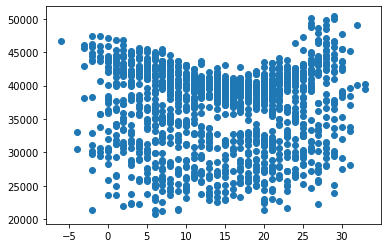

In [5]:
plt.scatter(ita_08["Gradi"], ita_08["Consumo"])
plt.show()

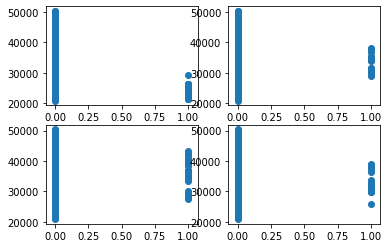

In [6]:
plt.subplot(221)
plt.scatter(ita_08["BankH"], ita_08["Consumo"])
plt.subplot(222)
plt.scatter(ita_08["EndYear"], ita_08["Consumo"])
plt.subplot(223)
plt.scatter(ita_08["AugustB"], ita_08["Consumo"])
plt.subplot(224)
plt.scatter(ita_08["AugustC"], ita_08["Consumo"])
plt.show()

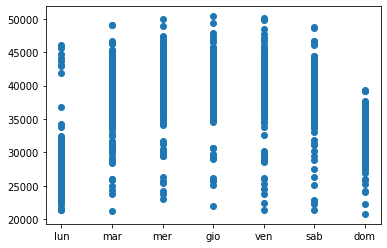

In [7]:
plt.scatter(ita_08["Giorno"], ita_08["Consumo"])
plt.show()

In [8]:
ita_08["Gradi2"] = ita_08["Gradi"]**2

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

def preprocess_scale(X, scaler=None):
    if not scaler:  
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

def preprocess_OneHot(X,encoder=None):
    if not encoder:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder.fit(X)
    X = encoder.transform(X).toarray()
    return X, encoder

def preprocessing(X, OH_encoder=None, scaler=None):
    X_categorical = X["Giorno"].to_numpy().reshape(-1, 1)
    X_numeric = X[["Prezzo","Gradi","Gradi2","BankH","EndYear","AugustB","AugustC"]] 
    X_categorical, OH_encoder = preprocess_OneHot(X_categorical, OH_encoder)
    X_numeric, scaler = preprocess_scale(X_numeric, scaler)
    
    dim_X_cat = X_categorical.shape[1]
    dim_X_num = X_numeric.shape[1]
    X = np.ndarray(shape=(X.shape[0],dim_X_cat+dim_X_num))
    # print(X_categorical.shape[1])
    # print(X_numeric.shape[1])

    X[:,0:dim_X_num] = X_numeric
    X[:,dim_X_num:dim_X_num+dim_X_cat] = X_categorical
    return X, OH_encoder, scaler

def metrics(X_test,y_test,regressor):
    #R2
    R2 = regressor.score(X=X_test,y=y_test.ravel())
    y_pred = regressor.predict(X_test)
    #RMSE
    RMSE = mean_squared_error(y_test, y_pred,squared=False)
    #MAE
    MAE = mean_absolute_error(y_test, y_pred)
    return R2,RMSE,MAE

def print_result(R2,RMSE,MAE,reg):
    print("R2 = %.2f" % R2)
    print("RMSE = %.2f" % RMSE)
    print("MAE = %.2f" % MAE)
    if hasattr(reg, 'coef_'):
        print()
        print("Coeff:")
        print(reg.coef_)
    if hasattr(reg, 'intercept_'):
        print()
        print("Intercept:")
        print(reg.intercept_)
        
def plot_result(X_train,X_test,y_train,y_test,regressor,scaler,onlyTest = False):
    
    y_test_p = regressor.predict(X_test)
    y_test = scaler.inverse_transform(y_test)
    y_test_p = scaler.inverse_transform(y_test_p)
    
    if not(onlyTest):
        y_train_p = regressor.predict(X_train)    
        y_train = scaler.inverse_transform(y_train)
        y_train_p = scaler.inverse_transform(y_train_p)
        forcast = np.concatenate((y_train_p,y_test_p))
        real = np.concatenate((y_train,y_test))
    else:
        forcast = y_test_p
        real = y_test
        
    plt.rcParams["figure.figsize"] = (20,3)
    plt.plot(real, color = 'blue', label = 'Real Test Set')
    plt.plot(forcast, linewidth=1,color = 'red', label = 'Predicted Test Set')
    plt.title('Consumi Energetici')
    plt.xlabel('Time')
    plt.ylabel('Consumo')
    plt.legend()
    plt.show()
    

In [10]:
X_train, X_test, y_train, y_test = train_test_split(ita_08[["Prezzo","Gradi","Gradi2","BankH","EndYear","AugustB","AugustC","Giorno"]], ita_08["Consumo"], test_size=0.2, random_state=42)

In [11]:
X_train, OH_encoder, scaler = preprocessing(X_train)
y_train, scaler_y = preprocess_scale(y_train.to_numpy().reshape(-1, 1))

X_test,_,_ = preprocessing(X_test,OH_encoder,scaler)
y_test,_ = preprocess_scale(y_test.to_numpy().reshape(-1, 1), scaler_y)

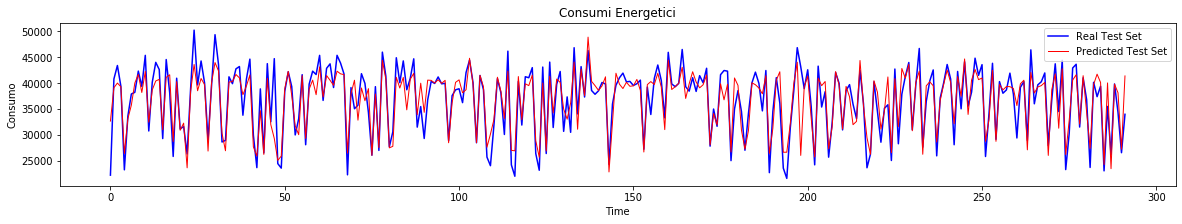

R2 = 0.80
RMSE = 0.47
MAE = 0.34

Coeff:
[ 0.19790848 -0.55402869  0.61632327 -0.35063974 -0.1424186  -0.14685802
 -0.16079521 -0.92335298  0.56171627 -1.54526953  0.54149851  0.49658087
  0.37271852  0.49610835]

Intercept:
0.012669884423453936


In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

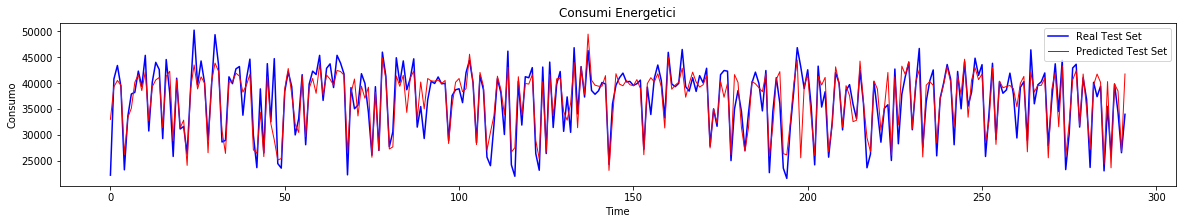

R2 = 0.80
RMSE = 0.47
MAE = 0.33

Coeff:
[[ 0.18833901 -0.63600136  0.67125282 -0.34832458 -0.16089903 -0.13088496
  -0.17095224 -0.87894836  0.55960534 -1.63916114  0.55502206  0.48531131
   0.42429917  0.49387162]]

Intercept:
[0.03767206]


In [13]:
from sklearn.svm import SVR
#Kernel Lineare
reg = SVR(kernel='linear')
reg.fit(X_train,y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

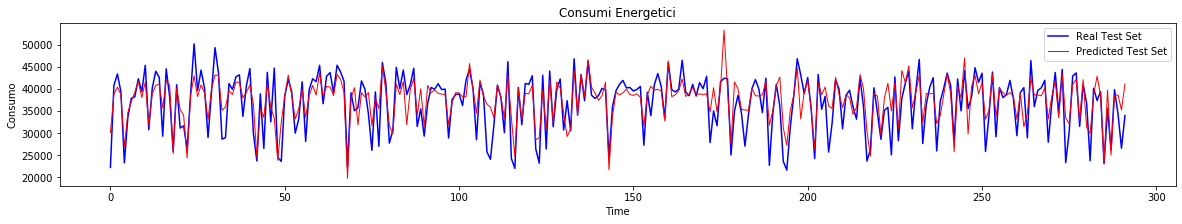

R2 = 0.67
RMSE = 0.61
MAE = 0.46

Intercept:
[0.17526042]


In [14]:
#Kernel Polinomiale
reg = SVR(kernel='poly')
reg.fit(X_train,y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

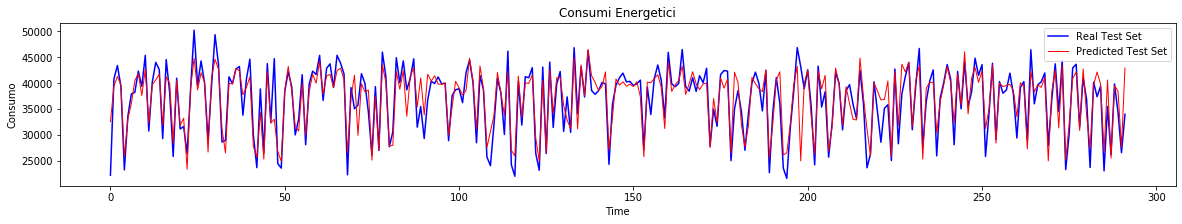

R2 = 0.81
RMSE = 0.47
MAE = 0.34

Intercept:
[-0.21806494]


In [15]:
#Kernel Gaussiano
reg = SVR(kernel='rbf')
reg.fit(X_train,y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

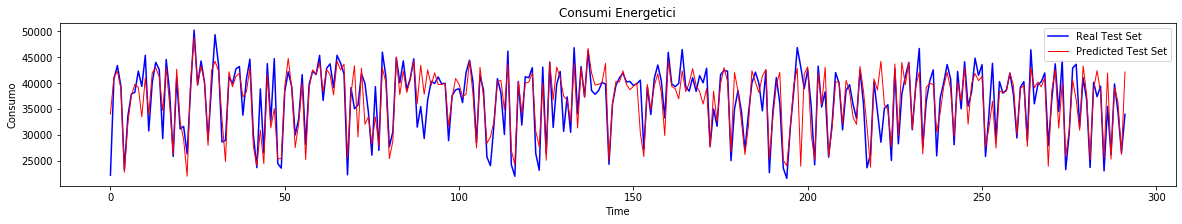

R2 = 0.75
RMSE = 0.54
MAE = 0.37


In [16]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 2, random_state = 42)
reg.fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

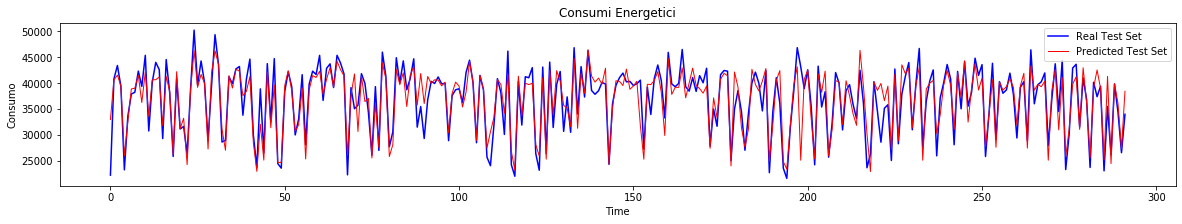

R2 = 0.81
RMSE = 0.46
MAE = 0.33


In [17]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
reg.fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

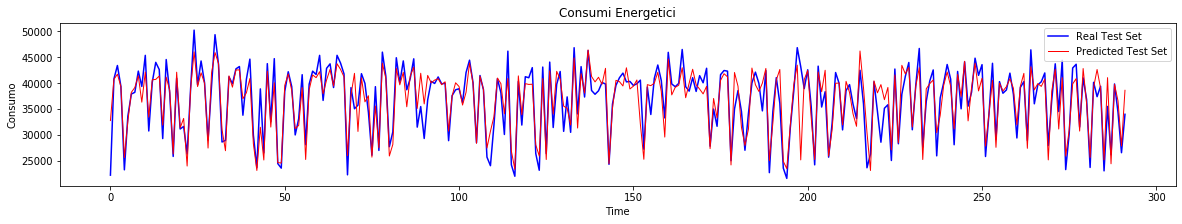

R2 = 0.81
RMSE = 0.46
MAE = 0.33


In [18]:
##Random Forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 1000, random_state = 42)
reg.fit(X_train, y_train.ravel())
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

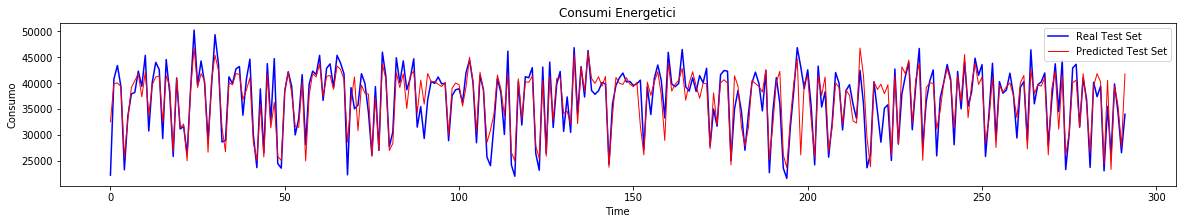

R2 = 0.82
RMSE = 0.46
MAE = 0.33


In [19]:
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimators=100,reg_lambda=2,gamma=0.1,max_depth=3)
reg.fit(X_train, y_train)
R2,RMSE,MAE = metrics(X_test,y_test,reg)

plot_result(X_train,X_test,y_train,y_test,reg,scaler_y,True)
print_result(R2,RMSE,MAE,reg)

In [21]:
pd.DataFrame(reg.feature_importances_.reshape(1, -1), columns=["Prezzo","Gradi","Gradi2","BankH","EndYear","AugustB","AugustC","G1","G2","G3","G4","G5","G6","G7"])

,Prezzo,Gradi,Gradi2,BankH,EndYear,AugustB,AugustC,G1,G2,G3,G4,G5,G6,G7
0,0.015936,0.013768,0.003756,0.173593,0.031784,0.024172,0.027626,0.230104,0.006916,0.43878,0.019012,0.001276,0.007546,0.005732
